Link to the google drive folder where all the datasets were downloaded and stored:
Download on your local drive[It will be a zipped file]. 
Exract the folder after downloading and then upload the folder on your drive again.

https://drive.google.com/drive/folders/1vQ0GO0L-FbHJ1cgSVlzFqHgXYF_j53SI?usp=sharing

## **Importing and installing all packages and Libraries**

In [1]:
# Installing required for HVG and NVG calculations

!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 16.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 9.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 17.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 7.1 MB/s 
  Created wheel for cairocffi: filename=cairoc

In [2]:
# Importing all required libraries

import seaborn as sns
from ts2vg import NaturalVG
import numpy as np
import networkx as nx
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import pandas as pd
import matplotlib.pyplot as plt

# **Reading and storing datasets in respective lists[Chest,Head]**

In [3]:
# Function to store all datasets of all subjects and activities particular to sensor placement(either chest or head in this case) 

def input_dfs(sensor_placement):
  walk=[]
  run=[]
  up=[]
  down=[]
  for i in range(1,16):
    wal_t=pd.read_csv('/content/drive/MyDrive/Project2/sub'+str(i)+'/acc_walking_csv/acc_walking_'+sensor_placement+'.csv')
    run_t=pd.read_csv('/content/drive/MyDrive/Project2/sub'+str(i)+'/acc_running_csv/acc_running_'+sensor_placement+'.csv')
    up_t=pd.read_csv('/content/drive/MyDrive/Project2/sub'+str(i)+'/acc_climbingup_csv/acc_climbingup_'+sensor_placement+'.csv')
    down_t=pd.read_csv('/content/drive/MyDrive/Project2/sub'+str(i)+'/acc_climbingdown_csv/acc_climbingdown_'+sensor_placement+'.csv')
    walk.append(wal_t)
    run.append(run_t)
    up.append(up_t)
    down.append(down_t)
  return(walk,run,up,down)

In [4]:
# Calling the above function for chest placement and head placement and storing the datasets in their respective lists

sensors=['chest','head']
chest=[]
head=[]
for sens in sensors:
  w,r,u,d=input_dfs(sens)
  if(sens=='chest'):                      # Using break to make sure that it doesnt waste compute power and memory when run twice[By mistake]
    if(len(chest)>=4):                    # It ensures only one time storage of all datasets in these two lists
      break
    chest.append(w)
    chest.append(r)
    chest.append(u)
    chest.append(d)
  else:
    if(len(head)>=4):                     # Using break to make sure that it doesnt waste compute power and memory when run twice[By mistake]
      break                               # It ensures only one time storage of all datasets in these two lists
    head.append(w)
    head.append(r)
    head.append(u)
    head.append(d)

# **Functions for HVG and NVG parameter calculations**

In [5]:
# Function to get HVG parameters in a list and returning the list

def HVGparameters(df,col):
  g = HorizontalVG()
  g.build(df[col][1000:2025])
  ig_g = g.as_igraph()
  out=[]
  out.append('HVG')
  out.append(col)
  out.append(ig_g.ecount())
  out.append(np.mean(ig_g.degree()))
  out.append(ig_g.diameter())
  out.append(ig_g.average_path_length())
  return(out)

In [6]:
# Function to get NVG parameters in a list and returning the list

def NVGparameters(df,col):
  g = NaturalVG()
  g.build(df[col][1000:2025])
  ig_g = g.as_igraph()
  out=[]
  out.append('NVG')
  out.append(col)
  out.append(ig_g.ecount())
  out.append(np.mean(ig_g.degree()))
  out.append(ig_g.diameter())
  out.append(ig_g.average_path_length())
  return(out)

# **Creating an empty ouput Data Frame with column names**

In [7]:
out_df=pd.DataFrame(columns=['Sensor_Placement','Method' ,'Subject' ,'Accelerometer_axis','Number_of_Links','Average_degree','Network_diameter','Average_path_length','Activity'])

In [8]:
out_df

,Sensor_Placement,Method,Subject,Accelerometer_axis,Number_of_Links,Average_degree,Network_diameter,Average_path_length,Activity


# **Function for filling the output dataframe Row-wise by calling hvg,nvg functions**

In [9]:
def table_generation(l,body_part):
  wa=l[0].copy()
  ru=l[1].copy()
  u_p=l[2].copy()
  d_o=l[3].copy()
  act=["Walking","Running","Climbing Up","Climbing Down"]
  cols=['attr_x','attr_y','attr_z']
  for i in range(1,16):
    if(len(out_df)>=720):
      out_df.drop(axis=0, inplace=True)
    sub='Subject'+str(i)
    sub_all=[]
    sub_all.append(wa[i-1])
    sub_all.append(ru[i-1])
    sub_all.append(u_p[i-1])
    sub_all.append(d_o[i-1])
    for j in range(len(act)):
      for k in cols:
        hvg=HVGparameters(sub_all[j],k)
        hvg.append(act[j])
        hvg.insert(0,body_part)
        hvg.insert(2,sub)
        out_df.loc[len(out_df)] = hvg
        nvg=NVGparameters(sub_all[j],k)
        nvg.append(act[j])
        nvg.insert(0,body_part)
        nvg.insert(2,sub)
        out_df.loc[len(out_df)] = nvg

In [10]:
table_generation(chest,'Chest')

In [11]:
table_generation(head,'Head')

# **Required Output Table**

In [12]:
out_df

,Sensor_Placement,Method,Subject,Accelerometer_axis,Number_of_Links,Average_degree,Network_diameter,Average_path_length,Activity
0,Chest,HVG,Subject1,attr_x,2028,3.957073,26,11.584668,Walking
1,Chest,NVG,Subject1,attr_x,5865,11.443902,10,4.446633,Walking
2,Chest,HVG,Subject1,attr_y,2026,3.953171,22,10.673826,Walking
3,Chest,NVG,Subject1,attr_y,6143,11.986341,9,4.244055,Walking
4,Chest,HVG,Subject1,attr_z,2027,3.955122,23,10.610686,Walking
...,...,...,...,...,...,...,...,...,...
715,Head,NVG,Subject15,attr_x,4127,8.052683,10,5.091016,Climbing Down
716,Head,HVG,Subject15,attr_y,2018,3.937561,34,14.346351,Climbing Down
717,Head,NVG,Subject15,attr_y,7276,14.197073,11,4.395654,Climbing Down
718,Head,HVG,Subject15,attr_z,2021,3.943415,39,16.953902,Climbing Down


# *Plotting "Running vs Walking" and "Climbing up vs Climbing Down" generated by both HVG,NVG for sensor placement position: Head,Chest and for X,Y,Z axis.*

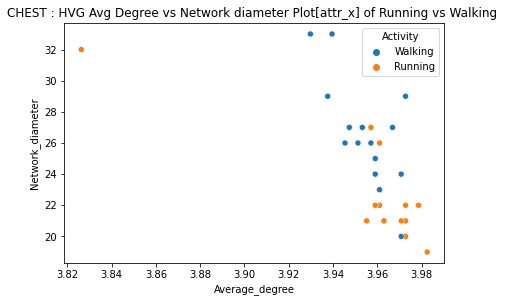

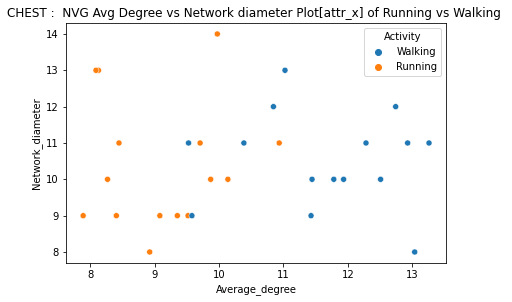

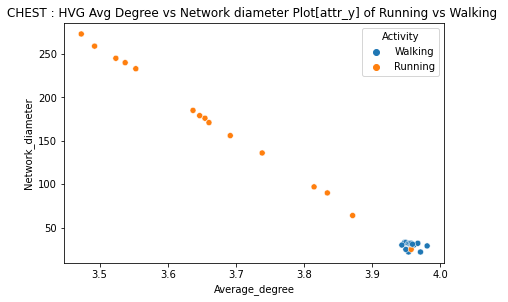

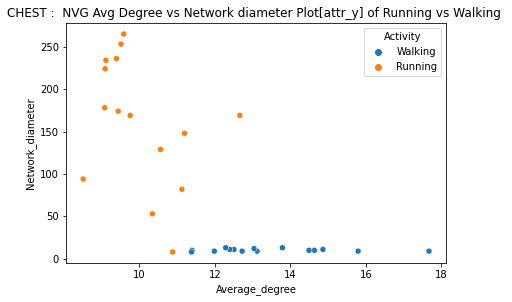

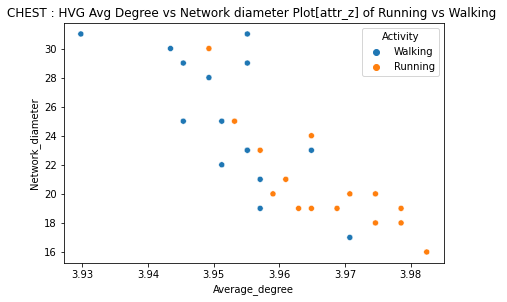

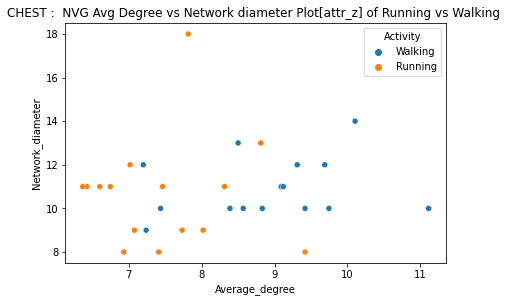

In [13]:
# Running Vs Walking - Chest- HVG and NVG-All three axes

df_run_wal_nvg_chest=out_df[((out_df['Activity']=='Walking') | (out_df['Activity']=='Running')) & (out_df['Method']=='NVG') & (out_df['Sensor_Placement']=='Chest') & (out_df['Sensor_Placement']=='Chest') ]
df_run_wal_hvg_chest=out_df[((out_df['Activity']=='Walking') | (out_df['Activity']=='Running')) & (out_df['Method']=='HVG') & (out_df['Sensor_Placement']=='Chest') ]
axes=['attr_x','attr_y','attr_z']
j=1
for ax in axes:
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_run_wal_hvg_chest[df_run_wal_hvg_chest['Accelerometer_axis']==ax], hue='Activity').set(title='CHEST : HVG Avg Degree vs Network diameter Plot['+ax+'] of Running vs Walking ')
  j=j+1
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_run_wal_nvg_chest[df_run_wal_nvg_chest['Accelerometer_axis']==ax], hue='Activity').set(title='CHEST :  NVG Avg Degree vs Network diameter Plot['+ax+'] of Running vs Walking ')
  j=j+1

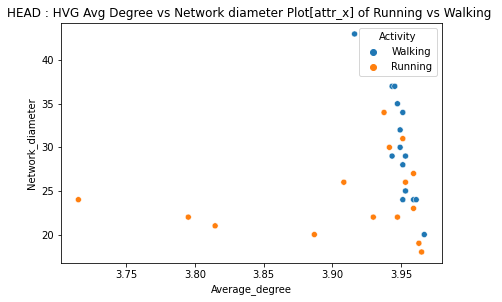

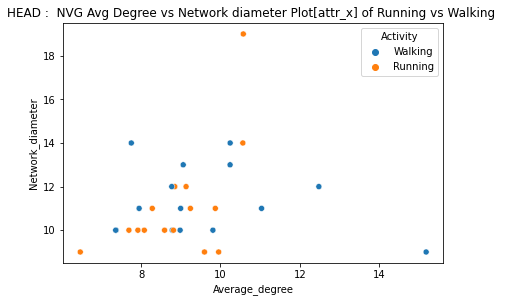

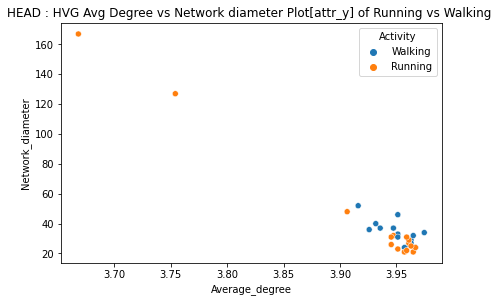

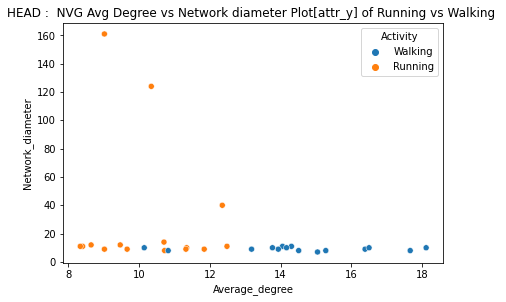

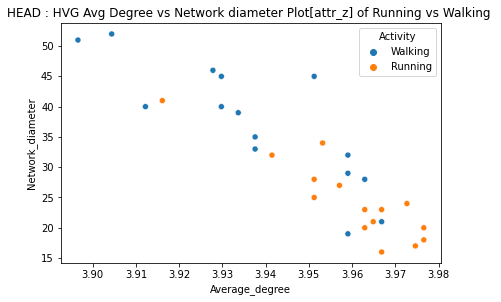

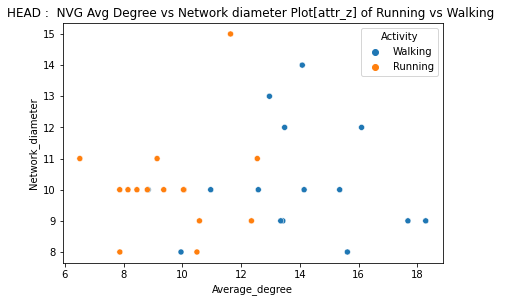

In [14]:
# Running Vs Walking - Head- HVG and NVG-All three axes

df_run_wal_nvg_chest=out_df[((out_df['Activity']=='Walking') | (out_df['Activity']=='Running')) & (out_df['Method']=='NVG') & (out_df['Sensor_Placement']=='Head') ]
df_run_wal_hvg_chest=out_df[((out_df['Activity']=='Walking') | (out_df['Activity']=='Running')) & (out_df['Method']=='HVG') & (out_df['Sensor_Placement']=='Head') ]
axes=['attr_x','attr_y','attr_z']
j=1
for ax in axes:
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_run_wal_hvg_chest[df_run_wal_hvg_chest['Accelerometer_axis']==ax], hue='Activity').set(title='HEAD : HVG Avg Degree vs Network diameter Plot['+ax+'] of Running vs Walking ')
  j=j+1
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_run_wal_nvg_chest[df_run_wal_nvg_chest['Accelerometer_axis']==ax], hue='Activity').set(title='HEAD :  NVG Avg Degree vs Network diameter Plot['+ax+'] of Running vs Walking ')
  j=j+1

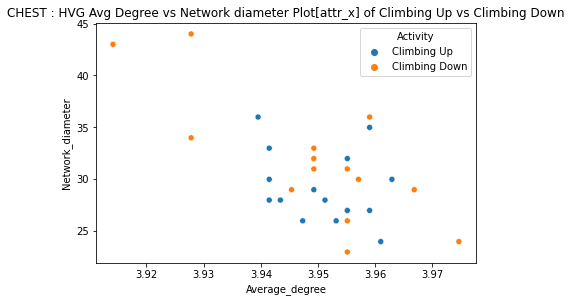

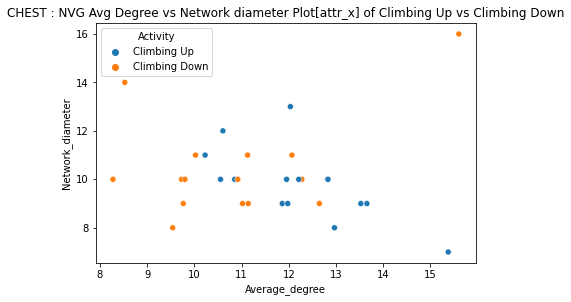

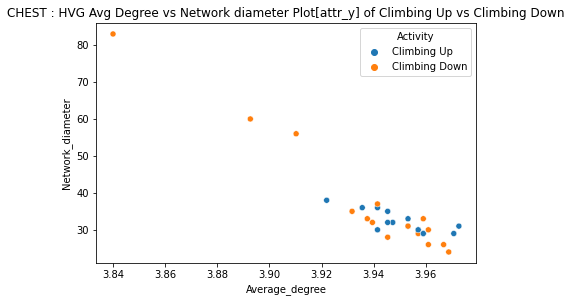

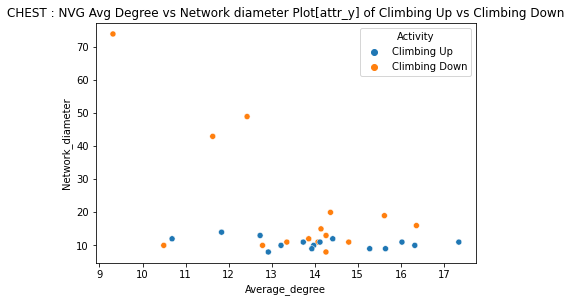

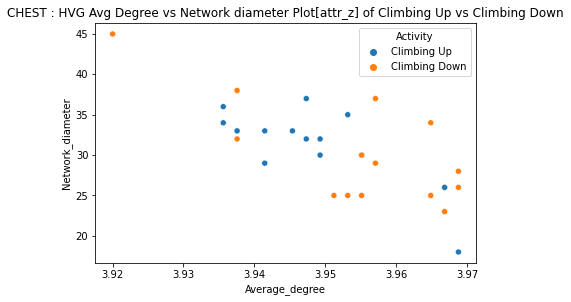

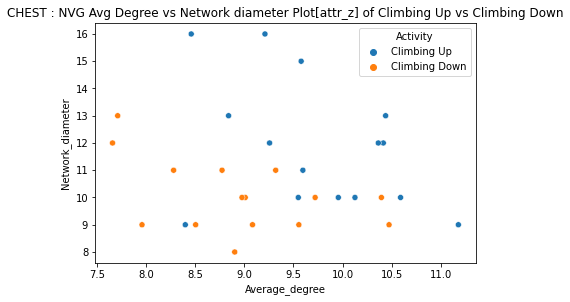

In [15]:
# Climbing Up Vs Climbing Down - Chest - HVG and NVG-All three axes

df_up_down_hvg_head=out_df[((out_df['Activity']=='Climbing Up') | (out_df['Activity']=='Climbing Down')) & (out_df['Method']=='HVG') & (out_df['Sensor_Placement']=='Chest')]
df_up_down_nvg_head=out_df[((out_df['Activity']=='Climbing Up') | (out_df['Activity']=='Climbing Down')) & (out_df['Method']=='NVG') & (out_df['Sensor_Placement']=='Chest')]
j=1
for ax in axes:
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_up_down_hvg_head[df_up_down_hvg_head['Accelerometer_axis']==ax], hue='Activity').set(title='CHEST : HVG Avg Degree vs Network diameter Plot['+ax+'] of Climbing Up vs Climbing Down')

  j=j+1
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_up_down_nvg_head[df_up_down_nvg_head['Accelerometer_axis']==ax], hue='Activity').set(title='CHEST : NVG Avg Degree vs Network diameter Plot['+ax+'] of Climbing Up vs Climbing Down')
  j=j+1

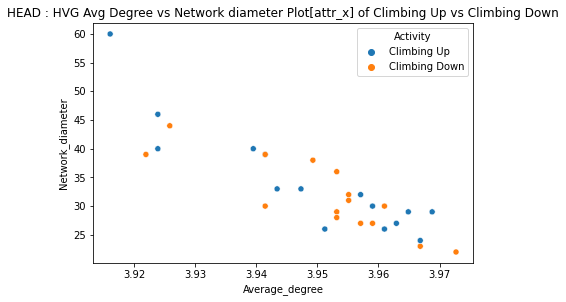

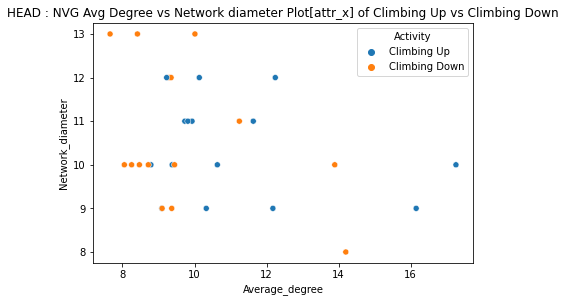

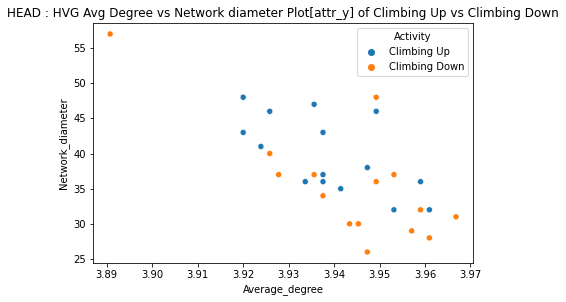

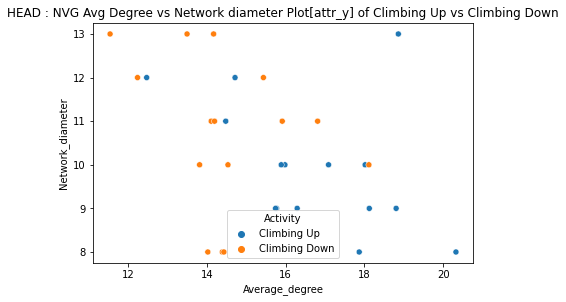

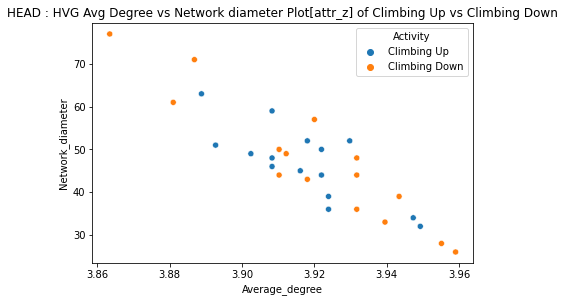

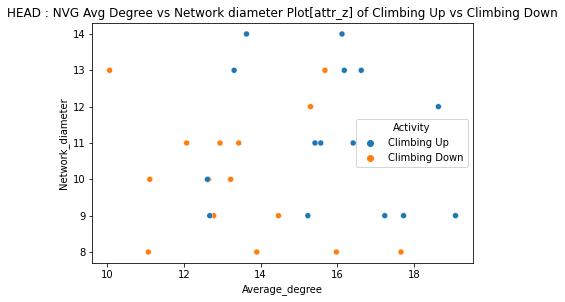

In [16]:
# Climbing Up Vs Climbing Down - Head- HVG and NVG-All three axes

df_up_down_hvg_head=out_df[((out_df['Activity']=='Climbing Up') | (out_df['Activity']=='Climbing Down')) & (out_df['Method']=='HVG') & (out_df['Sensor_Placement']=='Head')]
df_up_down_nvg_head=out_df[((out_df['Activity']=='Climbing Up') | (out_df['Activity']=='Climbing Down')) & (out_df['Method']=='NVG') & (out_df['Sensor_Placement']=='Head')]
j=1
for ax in axes:
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_up_down_hvg_head[df_up_down_hvg_head['Accelerometer_axis']==ax], hue='Activity').set(title='HEAD : HVG Avg Degree vs Network diameter Plot['+ax+'] of Climbing Up vs Climbing Down')

  j=j+1
  fig=plt.figure(figsize=(15,15))
  plt.subplot(3,2,j)
  sns.scatterplot(x='Average_degree', y='Network_diameter', data=df_up_down_nvg_head[df_up_down_nvg_head['Accelerometer_axis']==ax], hue='Activity').set(title='HEAD : NVG Avg Degree vs Network diameter Plot['+ax+'] of Climbing Up vs Climbing Down')
  j=j+1